In [337]:
from matplotlib import pyplot as plt
from scipy import stats
import numpy as np
import pandas as pd
import os
import random

In [338]:
file_path = os.path.join("..", "Resources", "housingCensus.csv")
housingCensusDF = pd.read_csv(file_path)
print(f"Data Shape: {housingCensusDF.shape}")
housingCensusDF.head()

Data Shape: (427, 34)


,Geo_ID,Geographic Area Name,Year,Estimate HOUSING OCCUPANCY Total housing units,Estimate HOUSING OCCUPANCY Occupied housing units,Estimate HOUSING OCCUPANCY Vacant housing units,Estimate YEAR STRUCTURE BUILT Total housing units,Estimate YEAR STRUCTURE BUILT Built 2005 or later,Estimate YEAR STRUCTURE BUILT Built 2000 to 2004,Estimate YEAR STRUCTURE BUILT Built 1990 to 1999,...,"Estimate VALUE Less than $50,000","Estimate VALUE $50,000 to $99,999","Estimate VALUE $100,000 to $149,999","Estimate VALUE $150,000 to $199,999","Estimate VALUE $200,000 to $299,999","Estimate VALUE $300,000 to $499,999","Estimate VALUE $500,000 to $999,999","Estimate VALUE $1,000,000 or more",Estimate VALUE Median (dollars),State
0,1,United States,2012,132452249.0,115969540.0,16482709.0,132452249.0,1199560.0,19799406.0,18348209.0,...,6784356,12100148,12245474,11370120,13393416,11068593,5696677,1460472,171900.0,Texas
1,1000,"Abilene city, Texas",2012,48583.0,42756.0,5827.0,48583.0,669.0,4371.0,3133.0,...,4654,7085,4910,3475,1338,645,71,0,95300.0,Texas
2,1924,"Allen city, Texas",2012,28802.0,28574.0,228.0,28802.0,1026.0,12728.0,7679.0,...,80,425,3321,6738,5524,3323,1345,286,199600.0,Texas
3,3000,"Amarillo city, Texas",2012,80816.0,74018.0,6798.0,80816.0,669.0,9818.0,6229.0,...,5144,13317,13526,6681,4093,1670,571,102,115000.0,Texas
4,4000,"Arlington city, Texas",2012,147340.0,132941.0,14399.0,147340.0,755.0,19901.0,28780.0,...,3302,16210,26830,13884,9746,2086,860,79,129100.0,Texas


In [339]:
file_path = os.path.join("..", "Resources", "analysis_crime.csv")
crimeDF = pd.read_csv(file_path)
print(f"Data Shape: {crimeDF.shape}")
crimeDF.head()

Data Shape: (70, 9)


,City,Year,Population,Violent Crime,Property Crime,Total Crime,"Total Crime Per Capita [10,000]","Violent Crime Per Capita [10,000]","Property Crime Per Capita [10,000]"
0,Baytown,2012,74420.0,247.0,3684.0,3931.0,528.218221,33.190003,495.028218
1,Friendswood,2012,36965.0,15.0,353.0,368.0,99.553632,4.057893,95.495739
2,Galveston,2012,49170.0,296.0,2469.0,2765.0,562.334757,60.199309,502.135448
3,Houston,2012,2177273.0,21610.0,107678.0,129288.0,593.807024,99.252597,494.554427
4,La Porte,2012,35054.0,61.0,604.0,665.0,189.707309,17.401723,172.305586


In [340]:
housingPriceRangeDF= pd.DataFrame(housingCensusDF[['Geo_ID', 'Year', 'Geographic Area Name', 'Estimate VALUE Less than $50,000','Estimate VALUE $50,000 to $99,999','Estimate VALUE $100,000 to $149,999',
                   'Estimate VALUE $150,000 to $199,999','Estimate VALUE $200,000 to $299,999','Estimate VALUE $300,000 to $499,999','Estimate VALUE $500,000 to $999,999',
                   'Estimate VALUE $1,000,000 or more','Estimate VALUE Median (dollars)']])

housingPriceRangeDF.head()

,Geo_ID,Year,Geographic Area Name,"Estimate VALUE Less than $50,000","Estimate VALUE $50,000 to $99,999","Estimate VALUE $100,000 to $149,999","Estimate VALUE $150,000 to $199,999","Estimate VALUE $200,000 to $299,999","Estimate VALUE $300,000 to $499,999","Estimate VALUE $500,000 to $999,999","Estimate VALUE $1,000,000 or more",Estimate VALUE Median (dollars)
0,1,2012,United States,6784356,12100148,12245474,11370120,13393416,11068593,5696677,1460472,171900.0
1,1000,2012,"Abilene city, Texas",4654,7085,4910,3475,1338,645,71,0,95300.0
2,1924,2012,"Allen city, Texas",80,425,3321,6738,5524,3323,1345,286,199600.0
3,3000,2012,"Amarillo city, Texas",5144,13317,13526,6681,4093,1670,571,102,115000.0
4,4000,2012,"Arlington city, Texas",3302,16210,26830,13884,9746,2086,860,79,129100.0


In [253]:
housingPriceRangeDF['Geographic Area Name'] = housingPriceRangeDF['Geographic Area Name'].replace("city, Texas","", regex=True)

housingPriceRangeDF['Geographic Area Name'] = housingPriceRangeDF['Geographic Area Name'].replace(", Texas","", regex=True)
housingPriceRangeDF['Geographic Area Name'] = housingPriceRangeDF['Geographic Area Name'].str.strip()

housingPriceRangeDF['Estimate VALUE Less than $150,000'] = housingPriceRangeDF['Estimate VALUE Less than $50,000'] + housingPriceRangeDF['Estimate VALUE $50,000 to $99,999'] + housingPriceRangeDF['Estimate VALUE $100,000 to $149,999']
housingPriceRangeDF['Estimate VALUE $150,000 to $299,999'] =  housingPriceRangeDF['Estimate VALUE $150,000 to $199,999'] + housingPriceRangeDF['Estimate VALUE $200,000 to $299,999']
housingPriceRangeDF['Estimate VALUE Between 0 and $300,000'] = housingPriceRangeDF['Estimate VALUE Less than $150,000'] + housingPriceRangeDF['Estimate VALUE $150,000 to $299,999']
 
housingPriceRangeDF.head()

,Geo_ID,Year,Geographic Area Name,"Estimate VALUE Less than $50,000","Estimate VALUE $50,000 to $99,999","Estimate VALUE $100,000 to $149,999","Estimate VALUE $150,000 to $199,999","Estimate VALUE $200,000 to $299,999","Estimate VALUE $300,000 to $499,999","Estimate VALUE $500,000 to $999,999","Estimate VALUE $1,000,000 or more",Estimate VALUE Median (dollars),"Estimate VALUE Less than $150,000","Estimate VALUE $150,000 to $299,999","Estimate VALUE Between 0 and $300,000"
0,1,2012,United States,6784356,12100148,12245474,11370120,13393416,11068593,5696677,1460472,171900.0,31129978,24763536,55893514
1,1000,2012,Abilene,4654,7085,4910,3475,1338,645,71,0,95300.0,16649,4813,21462
2,1924,2012,Allen,80,425,3321,6738,5524,3323,1345,286,199600.0,3826,12262,16088
3,3000,2012,Amarillo,5144,13317,13526,6681,4093,1670,571,102,115000.0,31987,10774,42761
4,4000,2012,Arlington,3302,16210,26830,13884,9746,2086,860,79,129100.0,46342,23630,69972


In [341]:
cityNames = [70808 ,41980, 16432,35000, 48804, 7000, 56000, 56348, 72656, 77546, 77550, 77551 ]

housingPriceHoustonDF = housingPriceRangeDF[housingPriceRangeDF['Geo_ID'].isin(cityNames)]


housingPriceHoustonDF = housingPriceHoustonDF.rename(columns={'Geographic Area Name': 'City'})

housingPriceHoustonDF.to_csv('houstonHousing.csv', index = False)

housingPriceHoustonDF = housingPriceHoustonDF.reset_index(drop = True)

print(housingPriceHoustonDF)
#

    Geo_ID  Year                       City  Estimate VALUE Less than $50,000  \
0     7000  2012       Beaumont city, Texas                              5510   
1    35000  2012        Houston city, Texas                             25598   
2    41980  2012    League City city, Texas                               892   
3    48804  2012  Missouri City city, Texas                               248   
4    56000  2012       Pasadena city, Texas                              3347   
..     ...   ...                        ...                               ...   
77   77550  2016                  Galveston                              2624   
78   77550  2017                  Galveston                              2733   
79   77551  2017                   La Porte                              2935   
80   77550  2018                  Galveston                              2876   
81   77551  2018                   La Porte                              2952   

    Estimate VALUE $50,000 

In [345]:
# crime data filtered

crimeDataFilteredDF = crimeDF[['City', 'Year' ,'Population', 'Violent Crime', 'Property Crime']]
 
mergedDF = pd.merge(crimeDF, housingPriceHoustonDF, on = ['City', 'Year'], how='inner' )

print (mergedDF)

         City  Year  Population  Violent Crime  Property Crime  Total Crime  \
0   Galveston  2012     49170.0          296.0          2469.0       2765.0   
1    La Porte  2012     35054.0           61.0           604.0        665.0   
2   Galveston  2013     48067.0          236.0          2335.0       2571.0   
3    La Porte  2013     34671.0           40.0           593.0        633.0   
4   Galveston  2014     48961.0          256.0          2054.0       2310.0   
5    La Porte  2014     34852.0           70.0           584.0        654.0   
6   Galveston  2015     50065.0          224.0          1818.0       2042.0   
7    La Porte  2015     35336.0           79.0           560.0        639.0   
8   Galveston  2016     50667.0          244.0          1771.0       2015.0   
9    La Porte  2016     35410.0           73.0           602.0        675.0   
10  Galveston  2017     51021.0          257.0          1790.0       2047.0   
11   La Porte  2017     35293.0          103.0      

In [322]:
randomSample = []

 
lowRangeRandomSample = random.sample(range(25000, 100000), 200) 
randomSample.extend(lowRangeRandomSample)

mediumRangeRandomSample = random.sample(range(100000, 200000), 300) 
randomSample.extend(mediumRangeRandomSample)

#count = int(mergedDF['Estimate VALUE $100,000 to $149,999'].mean()/100)
highRangeRandomSample = random.sample(range(200000, 300000), 300)  
randomSample.extend(highRangeRandomSample)



# build x values

quantile = mergedDF['Estimate VALUE Between 0 and $300,000'].quantile([0,1])

#sortDF = mergedDF.sort_values(by=['Estimate VALUE Less than $150,000'], ascending=False).reset_index(drop = True)
#print(sortDF)

maxValueRow = mergedDF[mergedDF['Estimate VALUE Between 0 and $300,000'] == quantile[1]]
 
minValueRow = mergedDF[mergedDF['Estimate VALUE Between 0 and $300,000'] <= quantile[0]] 


populationmean = mergedDF['Population'].mean()/10000

highCrimeCount = int((maxValueRow['Violent Crime']  + maxValueRow['Property Crime'])/(populationmean))
lowCrimeCount = int((minValueRow['Violent Crime']  + minValueRow['Property Crime'])/(populationmean))


crimeRandomSample = random.sample(range(lowCrimeCount, highCrimeCount), len(randomSample))  

# plot  the price range as Y axis, crime on X Axis

y_valuesdf = pd.DataFrame(randomSample ) * 1.0
x_valuesdf = (pd.DataFrame(crimeRandomSample ) ) / 100

x_values = x_valuesdf[0]
y_values = y_valuesdf[0]

 

In [428]:

#create a data frame for random sample

randomSampledf = pd.DataFrame()
# create a randomSampleList
randomSampleList = []

#random sample for the price range $25000 to $100000
randomSamples = random.sample(range(25000, 100000), 200) 
randomSampleList.extend(lowRangeRandomSample)

#random sample for the price range $25000 to $100000
randomSamples = random.sample(range(100000, 200000), 300) 
randomSampleList.extend(randomSamples)

#count = int(mergedDF['Estimate VALUE $100,000 to $149,999'].mean()/100)
randomSamples = random.sample(range(200000, 300000), 300)  
randomSampleList.extend(randomSamples)


# random sample for the price range $300000 to $500000 
randomSamples = random.sample(range(300000, 500000), 800) 
randomSampleList.extend(randomSamples)


# random sample for the price range $500000 to $1 million

randomSamples = random.sample(range(500000, 1000000), 800) 
randomSampleList.extend(randomSamples)

# build the dataframe

randomSampledf['RandomSample'] = randomSampleList



In [336]:

#create the bins
binNames = ['Estimate VALUE Less Than $299,999', 'Estimate VALUE $300,000 to $499,999', '$500,000 to $1 million']
binvalues = [0, 299999, 499999,999999]

binDF = pd.cut(randomSampledf['RandomSample'], bins = binvalues, labels = binNames)

binDF.describe()


count                                    2300
unique                                      3
top       Estimate VALUE $300,000 to $499,999
freq                                     1100
Name: RandomSample, dtype: object

In [419]:
df_LessThan300000 = pd.DataFrame(randomSampledf[randomSampledf['RandomSample'] < 300000])
df_GreaterThan500000 = pd.DataFrame(randomSampledf[randomSampledf['RandomSample'] >=500000])

#build y axis


highCrimeCount = int(mergedDF['Violent Crime Per Capita [10,000]'].max()) * 10
lowCrimeCount = 0

print(highCrimeCount)
print(lowCrimeCount)

crimeRandomSample = random.sample(range(lowCrimeCount, highCrimeCount), len(df_LessThan300000)) 

crimeRandomSample.sort(reverse = True)


df_LessThan300000 ['CrimeRandom'] = crimeRandomSample
df_GreaterThan500000['CrimeRandom'] = crimeRandomSample





# polynomial - males
male_fit = np.polyfit(df_LessThan300000['CrimeRandom'], df_LessThan300000['RandomSample'], 2)
 
# polynomial - females
female_fit = np.polyfit(df_LessThan300000['CrimeRandom'], df_LessThan300000['RandomSample'],2)

print(male_fit)

# Scatter plots.
ax1 = df_LessThan300000.plot(kind='scatter', x='CrimeRandom', y='RandomSample', color='blue', alpha=0.5, figsize=(10, 7))
df_GreaterThan500000.plot(kind='scatter', x='CrimeRandom', y='RandomSample', color='magenta', alpha=0.5, figsize=(10, 7), ax=ax1)
# regression lines
plt.plot(df_LessThan300000['RandomSample'], male_fit[0] * df_LessThan300000['RandomSample'] + male_fit[1], color='darkblue', linewidth=2)
plt.plot(df_GreaterThan500000['RandomSample'], female_fit[0] * df_GreaterThan500000['RandomSample'] + female_fit[1], color='deeppink', linewidth=2)
# regression equations
plt.text(65, 230, 'y={:.2f}+{:.2f}*x'.format(male_fit[1], male_fit[0]), color='darkblue', size=12)
plt.text(70, 130, 'y={:.2f}+{:.2f}*x'.format(female_fit[1], female_fit[0]), color='deeppink', size=12)
# legend, title and labels.
plt.legend(labels=['Price < 300000', 'Price > 500000', '<$300,000', '>$300,000'])

plt.title('Relationship between Average Housing Price and Crime', size=24)
plt.xlabel('Crime Per capita', size=18)
plt.ylabel('Housing Price', size=18);


600
0


ValueError: Length of values (450) does not match length of index (600)

In [429]:

df_LessThan300000 = pd.DataFrame(randomSampledf[['RandomSample'] ])

y_valuesCount = len(df_LessThan300000)

#df_GreaterThan500000 = pd.DataFrame(randomSampledf[randomSampledf['RandomSample'] >=500000])

#build y axis
crimeRandomList =[]

highCrimeCount = int(mergedDF['Violent Crime Per Capita [10,000]'].max()) * 10
lowCrimeCount = int(mergedDF['Violent Crime Per Capita [10,000]'].min()) * 10

print (highCrimeCount)
print (lowCrimeCount)

# build random sample 
while (len (crimeRandomList) <= len(df_LessThan300000 )) :
    crimeRandom = random.sample(range(lowCrimeCount, highCrimeCount), (highCrimeCount - lowCrimeCount)) 
    random.shuffle(crimeRandom)
    if (len(crimeRandom) <  )
    crimeRandomList.extend(crimeRandom)

x_valuesdf = pd.DataFrame(crimeRandomList )

x_values = x_valuesdf[0] * 1.0
y_values =  df_LessThan300000['RandomSample'] 


#df_LessThan300000 ['CrimeRandom'] = crimeRandomSample
#df_GreaterThan500000['CrimeRandom'] = crimeRandomSample

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values )

 
# Get regression values
regress_values = x_values * slope + intercept

 # Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.scatter(x_values,y_values, alpha=0.8, color ='skyblue', marker="o", edgecolor="black")
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Crime Rate')
plt.ylabel('Average Housing Price')

plt.ylim(10000)
plt.text(5,10000,line_eq, fontsize=15,color="red")

 


2700
600
110


ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 2940 and the array at index 1 has size 2700

In [ ]:

# polynomial - males
male_fit = np.polyfit(df_males.Height, df_males.Weight, 1)
# array([   5.96177381, -224.49884071])
# polynomial - females
female_fit = np.polyfit(df_females.Height, df_females.Weight, 1)
# array([   5.99404661, -246.01326575])
# scatter plots and regression lines
# males and females dataframes
df_males = df[df['Gender'] == 'Male']
df_females = df[df['Gender'] == 'Female']
# Scatter plots.
ax1 = df_males.plot(kind='scatter', x='Height', y='Weight', color='blue', alpha=0.5, figsize=(10, 7))
df_females.plot(kind='scatter', x='Height', y='Weight', color='magenta', alpha=0.5, figsize=(10, 7), ax=ax1)
# regression lines
plt.plot(df_males.Height, male_fit[0] * df_males.Height + male_fit[1], color='darkblue', linewidth=2)
plt.plot(df_females.Height, female_fit[0] * df_females.Height + female_fit[1], color='deeppink', linewidth=2)
# regression equations
plt.text(65, 230, 'y={:.2f}+{:.2f}*x'.format(male_fit[1], male_fit[0]), color='darkblue', size=12)
plt.text(70, 130, 'y={:.2f}+{:.2f}*x'.format(female_fit[1], female_fit[0]), color='deeppink', size=12)
# legend, title and labels.
plt.legend(labels=['Males Regresion Line', 'Females Regresion Line', 'Males', 'Females'])
plt.title('Relationship between Height and Weight', size=24)
plt.xlabel('Height (inches)', size=18)
plt.ylabel('Weight (pounds)', size=18);

In [ ]:
df_males = df[df['Gender'] == 'Male']
df_females = df[df['Gender'] == 'Female']
# polynomial - males
male_fit = np.polyfit(df_males.Height, df_males.Weight, 1)
# array([   5.96177381, -224.49884071])
# polynomial - females
female_fit = np.polyfit(df_females.Height, df_females.Weight, 1)
# array([   5.99404661, -246.01326575])
# scatter plots and regression lines
# males and females dataframes
df_males = df[df['Gender'] == 'Male']
df_females = df[df['Gender'] == 'Female']
# Scatter plots.
ax1 = df_males.plot(kind='scatter', x='Height', y='Weight', color='blue', alpha=0.5, figsize=(10, 7))
df_females.plot(kind='scatter', x='Height', y='Weight', color='magenta', alpha=0.5, figsize=(10, 7), ax=ax1)
# regression lines
plt.plot(df_males.Height, male_fit[0] * df_males.Height + male_fit[1], color='darkblue', linewidth=2)
plt.plot(df_females.Height, female_fit[0] * df_females.Height + female_fit[1], color='deeppink', linewidth=2)
# regression equations
plt.text(65, 230, 'y={:.2f}+{:.2f}*x'.format(male_fit[1], male_fit[0]), color='darkblue', size=12)
plt.text(70, 130, 'y={:.2f}+{:.2f}*x'.format(female_fit[1], female_fit[0]), color='deeppink', size=12)
# legend, title and labels.
plt.legend(labels=['Males Regresion Line', 'Females Regresion Line', 'Males', 'Females'])
plt.title('Relationship between Height and Weight', size=24)
plt.xlabel('Height (inches)', size=18)
plt.ylabel('Weight (pounds)', size=18);

The r-value is: 0.00033140434027353346


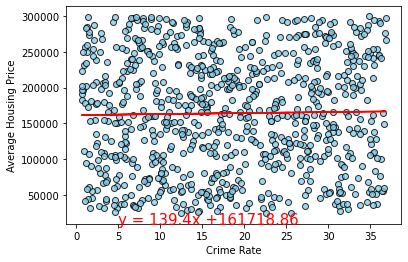

In [321]:

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

 
# Get regression values
regress_values = x_values * slope + intercept

 # Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.scatter(x_values,y_values, alpha=0.8, color ='skyblue', marker="o", edgecolor="black")
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Crime Rate')
plt.ylabel('Average Housing Price')

plt.ylim(10000)
plt.text(5,10000,line_eq, fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

In [324]:

#build y values

randomSample = []

 
lowRangeRandomSample = random.sample(range(300000, 500000), 500) 
randomSample.extend(lowRangeRandomSample)
 

# build x values

quantile = mergedDF['Estimate VALUE $300,000 to $499,999'].quantile([0,1])

#sortDF = mergedDF.sort_values(by=['Estimate VALUE Less than $150,000'], ascending=False).reset_index(drop = True)
#print(sortDF)

maxValueRow = mergedDF[mergedDF['Estimate VALUE $300,000 to $499,999'] == quantile[1]]
 
minValueRow = mergedDF[mergedDF['Estimate VALUE $300,000 to $499,999'] == quantile[0]] 

#minValueRow = minValueRows.iloc[0]

 

highCrimeCount = int(maxValueRow['Violent Crime']  + maxValueRow['Property Crime'])
lowCrimeCount = int(minValueRow['Violent Crime']  + minValueRow['Property Crime'])


crimeRandomSample = random.sample(range(lowCrimeCount, highCrimeCount), len(randomSample))  

# plot  the price range as Y axis, crime on X Axis

y_valuesdf = pd.DataFrame(randomSample ) * 1.0
x_valuesdf = pd.DataFrame(crimeRandomSample ) /100.0  

x_values = x_valuesdf[0]
y_values = y_valuesdf[0]

The r-value is: 0.0008005782376483264


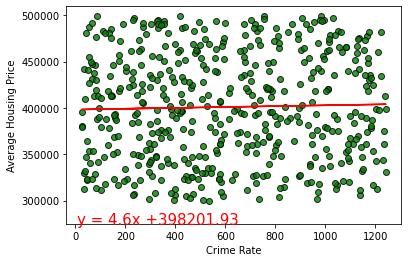

In [325]:

# y_values = mergedDF['Estimate VALUE Less than $150,000'] 

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

 
# Get regression values
regress_values = x_values * slope + intercept

 # Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.scatter(x_values,y_values, alpha=0.8, color ="green", marker="o", edgecolor="black")
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Crime Rate')
plt.ylabel('Average Housing Price')

plt.ylim(275000)
plt.text(5,275000,line_eq, fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()